In [1]:
from csv import reader
from random import random
import numpy as np
import math
from math import exp
trainFileName = "train.csv"
testFileName = "test.csv"
import matplotlib.pyplot as plt

In [2]:
def readDatasetFromCSV(fileName):
    Data = []
    with open(fileName, 'r') as file:
        csvReader = reader(file)
        next(csvReader, None)
        for row in csvReader:
            for i in range(1, 3):
                row[i] = float(row[i].strip())
            row[0] = int(row[0].strip())
            Data.append(row)
    # trainData = trainData[1:]
    return Data

#     firstRowFromCSV = trainData[0][1:]
#     firstRowFromCSVOutput = trainData[0][0]
def shuffleData(data):  
    np.random.shuffle(data)
    shuffleData = []
    shuffledOutput = []
    for row in data:
        shuffleData.append(row[1:])
        shuffledOutput.append(row[0])
    return shuffleData, shuffledOutput

# print(firstRowFromCSV)
# print(firstRowFromCSVOutput)

# for i in range(5):
#     print(trainingData[i], trainingOutput[i])

In [3]:
def createNetwork():
    numInputs = 2
    numHidden1 = 3
    numHidden2 = 3
    numOutput = 2
    hiddenLayer1 = [{'w': [random() for i in range(numInputs)]} for i in range(numHidden1)]
    # hiddenLayer1.append({'layer': 'hidden'})
    hiddenLayer2 = [{'w': [random() for i in range(numHidden1)]} for i in range(numHidden2)]
    # hiddenLayer2.append({'layer': 'hidden'})
    outputLayer = [{'w': [random() for i in range(numHidden2)]} for i in range(numOutput)]
    # outputLayer.append({'layer': 'output'})
    neuralNetwork = [hiddenLayer1, hiddenLayer2, outputLayer]
    return neuralNetwork
    x=[]
    W1 = []
    W2 = []
    W3 = []


In [4]:
def dotProduct(W, I):
    a=0.0
    for i in range(len(W)):
       a+=W[i]*I[i]
    return a

In [5]:
def softmaxActivationFunction(inputs):
    sum=0
    retVal=[]
    for i in range(len(inputs)):
        sum+= exp(inputs[i])
    retVal.append(exp(inputs[0]) / sum)
    retVal.append(exp(inputs[1]) / sum)
    return retVal

In [6]:
def sigActivationFunction(val):
    value = 1.0 / (1.0 + exp(-val))
    return value

In [7]:
def derivative(val):
    return val * (1.0 - val)

In [8]:
def forwardPropogation(network, data):
#     print(network)
    currentData = data
    layerCount=0
    softmaxInputs=[]
    for layer in network:
        layerCount+=1
        activatedValues = []
        for node in layer:
#             print(node['weights'])
            prod = dotProduct(node['w'], currentData)
#             print(prod)
            if(layerCount!=3):
                node['o'] = sigActivationFunction(prod)
#                 print(node['output'])
                activatedValues.append(node['o'])
            elif(layerCount==3):
                softmaxInputs.append(prod)
#                 print("Softmax:", softmaxInputs)
                if(len(softmaxInputs) == 2):
                    activatedValues = softmaxActivationFunction(softmaxInputs)
#                     print("activated: ", activatedValues)
                    layer[0]['o'] = activatedValues[0]
                    node['o'] = activatedValues[1]
        currentData = activatedValues
#     print("Summ Current Data: ", currentData[0] + currentData[1])
    return currentData, network
    

In [9]:
def runForwardPropogation(nn, inputData, rowOutput):
    fwdOutput, network = forwardPropogation(nn, inputData)
#     print([trainData[0][:1], fwdOutput])
    loss = 0
    targetOutput=[]
    if(rowOutput == 1):
        targetOutput = [0, 1]
    elif (rowOutput == 0):
        targetOutput = [1, 0]
    for i in range(2):
        loss += pow((targetOutput[i] - fwdOutput[i]), 2)
    return fwdOutput, loss, targetOutput, network
    print(loss)
# print(nn)
#backwardPropogation(nn, targetOutput)


In [10]:
def backwardPropogation(network, targetOutput):
    for i in reversed(range(len(network))):
        layer = network[i]
        error=[]
        if i == len(network)-1:
            for j in range(len(layer)):
                neuron = layer[j]
                e = 2 * (targetOutput[j] - neuron['o'])
                error.append(e)
        else:
            for j in range(len(layer)):
                err=0.0
                for neuron in network[i+1]:
                    err+=(neuron['w'][j] * neuron['e'])
                error.append(err)
        for j in range(len(layer)):
            neuron=layer[j]
            neuron['e'] = error[j] * derivative(neuron['o'])
    return network

In [11]:
def runBackwardPropogation(nn, targetOutput, inputData, learningRate):
    nn = backwardPropogation(nn, targetOutput)
#     for layer in nn:
#         print(layer, '\n\n')
    for i in range(len(nn)):
        inputVal=inputData
        if i!=0:
            inputVal = [neuron['o'] for neuron in nn[i-1]]
        for neuron in nn[i]:
            for j in range(len(inputVal)):
                neuron['w'][j] += learningRate * neuron['e'] * inputVal[j]
    return nn
# for layer in nn:
#     print(layer)

In [12]:
learningRate = 0.01
net = createNetwork()
data = readDatasetFromCSV(trainFileName)
lossPlot=[]
for it in range(300):
    shufData, shufOutput = shuffleData(data)
    sumLoss=0.0
    for i in range(len(shufData)):
        observedOutput, loss, target, nt = runForwardPropogation(net, shufData[i], shufOutput[i])
        sumLoss+=loss
        net = runBackwardPropogation(nt, target, shufData[i], learningRate)
    sumLoss = sumLoss/len(shufData)
    print("-->epoch=", it+1, "/ 1000   loss=", sumLoss)
#     for layer in net:
#         print(layer)
#     print("\n\n")
#     learningRate-=0.0005
    lossPlot.append(sumLoss)

-->epoch= 1 / 1000   loss= 0.5017205197821376
-->epoch= 2 / 1000   loss= 0.5005038613569429
-->epoch= 3 / 1000   loss= 0.4988197110172719
-->epoch= 4 / 1000   loss= 0.4989492996711302
-->epoch= 5 / 1000   loss= 0.496659723674879
-->epoch= 6 / 1000   loss= 0.4895313816864121
-->epoch= 7 / 1000   loss= 0.46638166090524097
-->epoch= 8 / 1000   loss= 0.3797163057619195
-->epoch= 9 / 1000   loss= 0.26271784463740716
-->epoch= 10 / 1000   loss= 0.2079311348833831
-->epoch= 11 / 1000   loss= 0.1832148979832957
-->epoch= 12 / 1000   loss= 0.17223268192169705
-->epoch= 13 / 1000   loss= 0.1677254153981936
-->epoch= 14 / 1000   loss= 0.16538499857107786
-->epoch= 15 / 1000   loss= 0.1644735496131923
-->epoch= 16 / 1000   loss= 0.163791621209553
-->epoch= 17 / 1000   loss= 0.16351832664680457
-->epoch= 18 / 1000   loss= 0.16314744643894807
-->epoch= 19 / 1000   loss= 0.16305318262336627
-->epoch= 20 / 1000   loss= 0.16304503368041964
-->epoch= 21 / 1000   loss= 0.162950357724782
-->epoch= 22 / 10

-->epoch= 172 / 1000   loss= 0.16176506049206535
-->epoch= 173 / 1000   loss= 0.16151506157426204
-->epoch= 174 / 1000   loss= 0.16135391313814704
-->epoch= 175 / 1000   loss= 0.1614219895550789
-->epoch= 176 / 1000   loss= 0.16134928643703914
-->epoch= 177 / 1000   loss= 0.16129736131291147
-->epoch= 178 / 1000   loss= 0.16088133975845134
-->epoch= 179 / 1000   loss= 0.16110492840643495
-->epoch= 180 / 1000   loss= 0.1611498443441318
-->epoch= 181 / 1000   loss= 0.16113722021748483
-->epoch= 182 / 1000   loss= 0.16137945672312465
-->epoch= 183 / 1000   loss= 0.16095819986123558
-->epoch= 184 / 1000   loss= 0.16142657690431048
-->epoch= 185 / 1000   loss= 0.16145511948929012
-->epoch= 186 / 1000   loss= 0.16153337708729637
-->epoch= 187 / 1000   loss= 0.16119283029915238
-->epoch= 188 / 1000   loss= 0.16145482074838416
-->epoch= 189 / 1000   loss= 0.16155052932973077
-->epoch= 190 / 1000   loss= 0.1615183164367849
-->epoch= 191 / 1000   loss= 0.1612162420112788
-->epoch= 192 / 1000   l

In [13]:
print("Learned Weights\n")
for layer in net:
#     print(layer)
    for neuron in layer:
        print(neuron['w'])
    print("\n")

Learned Weights

[-0.2847599330684195, 1.335822619026521]
[0.2582987650805415, -1.2783045525056005]
[-0.2767596766293208, 1.210084594239179]


[1.3172475224971159, -2.798667726815434, 0.7548311671365965]
[-1.2609559091035076, 2.01738717448787, -0.9017417770622949]
[-1.4595938187037076, 1.9600776081857638, -0.6619649291966271]


[4.161930613921799, -1.445046243477434, -1.341888925133302]
[-2.914143021080107, 2.381893110930764, 2.424589560708355]




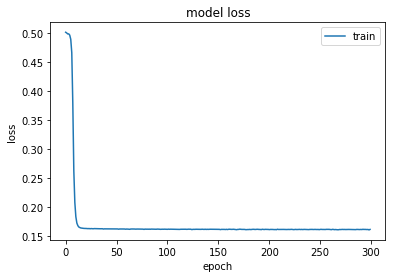

In [14]:
j=[]
for i in range(300):
    j.append(i)
plt.plot(np.asarray(j), np.asarray(lossPlot))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [15]:
### Running on test data
testData = readDatasetFromCSV(testFileName)
testInput=[]
testOutput=[]
for row in testData:
    testInput.append(row[1:])
    testOutput.append(row[0])
truePositive=0
trueNegative=0
falsePositive=0
falseNegative=0
for i in range(len(testInput)):
    o, l, tar, netw = runForwardPropogation(net, testInput[i], testOutput[i])
#     print(o, testOutput[i])
    if(testOutput[i]==0):
        if (o[0]>o[1]):
            trueNegative +=1
        else:
            falseNegative+=1
    elif(testOutput[i]==1):
        if (o[0]<o[1]):
            truePositive +=1
        else:
            falsePositive+=1
accuracy = ((truePositive + trueNegative) / len(testInput))*100
precision=(truePositive)/(truePositive+falsePositive)
recall=(truePositive)/(truePositive+falseNegative)
f1score=2*((precision*recall)/(precision+recall))
print("Test Metrics:")
print("   Total in test set:", len(testInput))
print("   Correctly predicted:", truePositive+trueNegative)
print("   Accuracy: ", accuracy,"%")
print("   Precision: ", precision)
print("   Recall: ", recall)
print("   F1-Score: ", f1score)





Test Metrics:
   Total in test set: 1250
   Correctly predicted: 1097
   Accuracy:  87.76 %
   Precision:  0.8761904761904762
   Recall:  0.8803827751196173
   F1-Score:  0.8782816229116945
